In [1200]:
# Import modules for future uses
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [1201]:
# 1.1 Data Collection - Reading training data

# read train.csv as training data
train_data = pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/train.csv", skipinitialspace=True)
# use head() to get the top of the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1202]:
# 1.2 Data Collection - Reading test data

# read test.csv as testing data
test_data = pd.read_csv("/Users/alexmak/Desktop/CMPUT/Personal/summer2023/TitanicProject/test.csv", skipinitialspace=True)
# use head() to get the top of the data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1203]:
# 2.1 Data Examining & Handling - Check data to find any data missing (NaN)

# Use df.describe to show descriptive stat for NUMERICAL VAR ONLY
# use include=all to show CATEGORICAL VAR too
train_data.describe(include='all')
# Found NaNs in Age, Name, Ticket, Cabin, Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [1204]:
# 2.2 Data Examining & Handling - Handle missing/ duplicate data

# Count all null values using df.isnull().sum()
print('\nNull values in training data: \n{0}'.format(train_data.isnull().sum()))
# Found Null values in Age(177), Cabin (687) and Embarked (2)
print('\nNull values in testing data:  \n{0}'.format(test_data.isnull().sum()))
# Found Null values in Age(86), Fare(1), Cabin (327)

# Count all duplicated values using df.duplicated().sum()
print('\nDuplicated Values in training data {0}'.format(train_data.duplicated().sum()))
print('Duplicated values in testing data {0}'.format(test_data.duplicated().sum()))
# Found No duplicate data below


Null values in training data: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values in testing data:  
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Duplicated Values in training data 0
Duplicated values in testing data 0


In [1205]:
# 2.3 Data Examining & Handling - Filling missing data

# 2.3.1 Fill Embarked in training by using the most common port of embarkment ()
# Find the most common port in training data
# Use the df[column name].value_counts() to show the counts of each value in col
# Then use .idxmax() to return the mode (most common) value
mode=train_data["Embarked"].value_counts().idxmax()

# Replace null with the mode value using df[Column name].fillna
# MAKE SURE use the argument inplace=True to make sure the replacement is done on current dataFrame
# Otherwise it will make a copy of dataframe (which you can assign it)
train_data["Embarked"].fillna(mode, inplace=True)

# check whether null values exist (for testing)
# print(train_data["Embarked"].isnull().sum()==0)

# 2.3.2 Fill Fare with the average value of all fares
# Find the average fare value in testing data
# Use the df[column name].mean to show the mean of all values in a col
average=test_data["Fare"].mean()

# Just like above
test_data["Fare"].fillna(average,inplace=True)

# checking incase
# print(test_data["Fare"].isnull().sum()==0)

# 2.3.3 Fill Age
# First find the average age for each name title, then put mean age back to missing data based on its name title

# 2.3.3.1 Find mean age for each name title
# find values in column A based on a conidition in column B:
# df[conidition on B][column A]
# use mean() to find average and round() to make sure it's whole #

mean_age_mr=train_data[train_data["Name"].str.contains('Mr.', na=False)]["Age"].mean().round()
mean_age_mrs=train_data[train_data["Name"].str.contains('Mrs.', na=False)]["Age"].mean().round()
mean_age_miss=train_data[train_data["Name"].str.contains('Miss.', na=False)]["Age"].mean().round()
mean_age_master=train_data[train_data["Name"].str.contains('Master.', na=False)]["Age"].mean().round()
mean_age_dr=train_data[train_data["Name"].str.contains('Dr.', na=False)]["Age"].mean().round()

# specifically for test data
mean_age_ms=train_data[train_data["Name"].str.contains('Ms.', na=False)]["Age"].mean().round()

# Rest filled with non NaN values 
mean_age_rev=train_data[train_data["Name"].str.contains('Rev.', na=False)]["Age"].mean().round()
mean_age_mme=train_data[train_data["Name"].str.contains('Mme.', na=False)]["Age"].mean().round()
mean_age_major=train_data[train_data["Name"].str.contains('Major.', na=False)]["Age"].mean().round()
mean_age_lady=train_data[train_data["Name"].str.contains('Lady.', na=False)]["Age"].mean().round()
mean_age_sir=train_data[train_data["Name"].str.contains('Sir.', na=False)]["Age"].mean().round()
mean_age_col=train_data[train_data["Name"].str.contains('Col.', na=False)]["Age"].mean().round()
mean_age_mlle=train_data[train_data["Name"].str.contains('Mlle.', na=False)]["Age"].mean().round()
mean_age_capt=train_data[train_data["Name"].str.contains('Capt.', na=False)]["Age"].mean().round()
mean_age_countess=train_data[train_data["Name"].str.contains('Countess.', na=False)]["Age"].mean().round()

# replace empty age with the mean age based on name title
# function to replace values from NaN with means
title_list=['Mrs.','Miss.', 'Mr.', 'Master.', 'Dr.', 'Ms.']
mean_list=[mean_age_mrs, mean_age_miss, mean_age_mr, mean_age_master, mean_age_dr, mean_age_ms]

for i in range(len(title_list)):
    train_data.loc[train_data["Name"].str.contains(title_list[i], na=False) & train_data["Age"].isna(),"Age"]=mean_list[i]
    test_data.loc[test_data["Name"].str.contains(title_list[i], na=False) & test_data["Age"].isna(),"Age"]=mean_list[i]

# 2.3.3.4 Actually Fill Cabin

# Fill cabin by check their fare to guess their cabin

# mean_fare_cabin_a=train_data[train_data["Cabin"]=='A']["Fare"].mean() # left wasted due to no correlation
mean_fare_cabin_b=train_data[train_data["Cabin"]=='B']["Fare"].mean()
mean_fare_cabin_c=train_data[train_data["Cabin"]=='C']["Fare"].mean()
mean_fare_cabin_d=train_data[train_data["Cabin"]=='D']["Fare"].mean()
mean_fare_cabin_e=train_data[train_data["Cabin"]=='E']["Fare"].mean()
mean_fare_cabin_f=train_data[train_data["Cabin"]=='F']["Fare"].mean()
mean_fare_cabin_g=train_data[train_data["Cabin"]=='G']["Fare"].mean()

# assign cabin base on fares, replace all unknown fare 
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]>=mean_fare_cabin_b), "Cabin"]="B"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_b) & (train_data["Fare"]>=mean_fare_cabin_c), "Cabin"]="C"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_c) & (train_data["Fare"]>=mean_fare_cabin_d), "Cabin"]="D"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_d) & (train_data["Fare"]>=mean_fare_cabin_e), "Cabin"]="E"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_e) & (train_data["Fare"]>=mean_fare_cabin_f), "Cabin"]="F"
train_data.loc[(train_data["Cabin"]=='X')&(train_data["Fare"]<mean_fare_cabin_f) & (train_data["Fare"]>=mean_fare_cabin_g), "Cabin"]="G"

# print(train_data[(train_data["Cabin"]=='X')&train_data["Fare"]>mean_fare_cabin_g]) # Empty data frame check to ensure all fare above the mean of cabin G has assigned to a new cabin

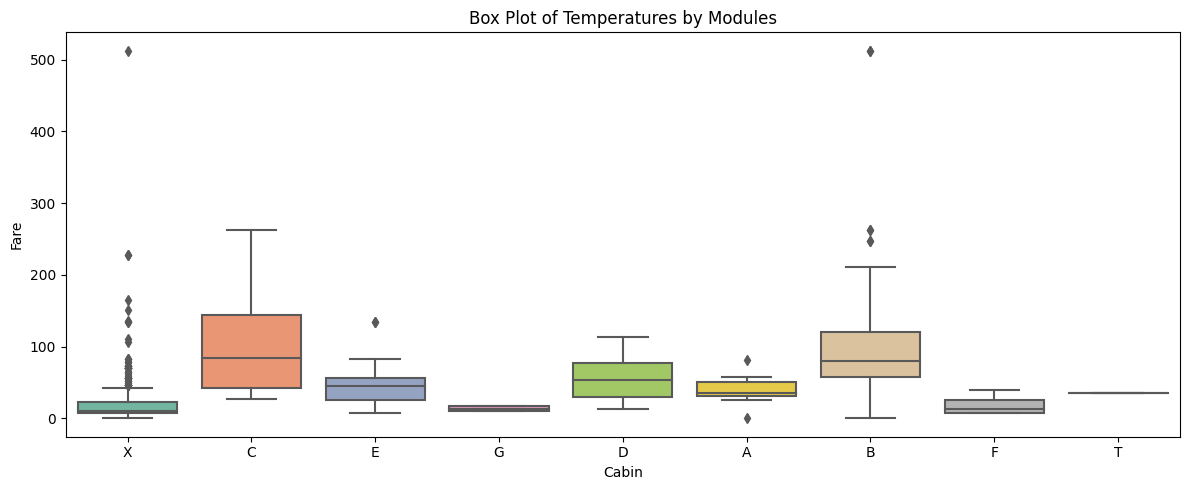

In [1206]:
# 2.4 Data Examining & Handling - Fill Cabin and observe data:  
import seaborn as sns
import matplotlib.pyplot as plt

# a. first group the unknown data into a group
# for known data, keep the first character
# Then display using seaborn's boxplot

# Training and testing data
train_data["Cabin"]=pd.Series('X'if pd.isnull(each) else each[0] for each in train_data["Cabin"])
test_data["Cabin"]=pd.Series('X'if pd.isnull(each) else each[0] for each in test_data["Cabin"])

# Plot Cabin data with fare to check how the unknown usually belong
plt.figure(figsize=(12,5))
plt.title('Box Plot of Temperatures by Modules')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set2')
plt.tight_layout()

# Result shows most from the unknown class (X) has a low fare

In [1207]:
# 2.5 Data Examining & Handling - Double check data to ensure

# Check entire dataset to make sure to null value
print(train_data.isnull().sum())
print(test_data.isnull().sum())
# Return 0 for every column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


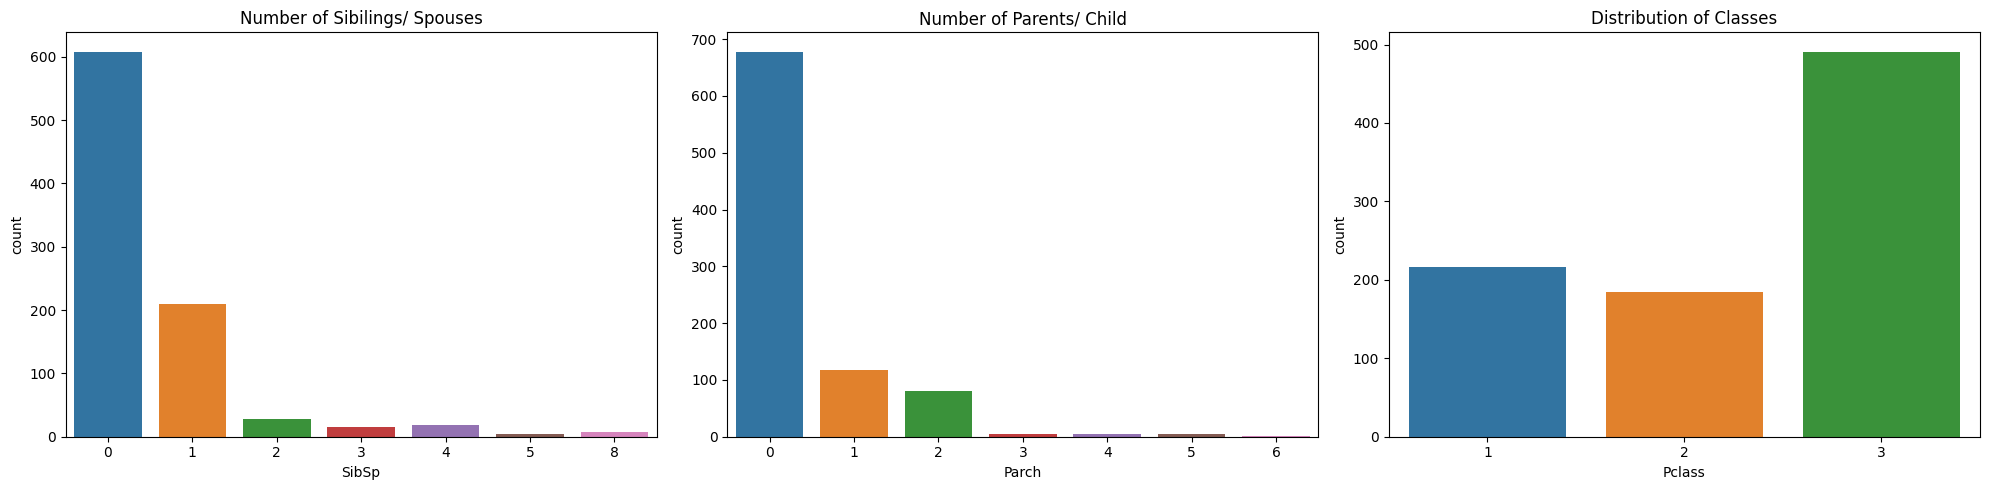

In [1208]:
# 3.1 Feature Engineering: analyze features through visualizations

# * Analyze features and extract impactful info from it
# * Even create new features from existing one

# 1. Analyze features through visualization (graphs) through sns and plt
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots using plt.subplots
# plt.subplots(row, column, figsize(x,y))
fig, axx=plt.subplots(1,3, figsize=(20,5))

# Using sns.histplot (histogram) or countplot (to show different colors)
# Make a graph SibSp X count with title
sns.countplot(data=train_data, x="SibSp", ax=axx[0]).set(title="Number of Sibilings/ Spouses")

# Make a graph Parch X count with title
sns.countplot(data=train_data, x="Parch", ax=axx[1]).set(title="Number of Parents/ Child")

# Make a graph Pclass X count with title
sns.countplot(data=train_data, x="Pclass", ax=axx[2]).set(title="Distribution of Classes")

# use plt.tight_layout to adjust padding among subplots
plt.tight_layout()

# Insights learned from the plots:
1. Most people are in 3rd class
2. Most people don't have parents/children 
3. Most people don't have sibilings/spouses

# Conclusions made
1. can create a feature to determine whether the passenger is alone or not (with family)

In [1209]:
# 3.2 Feature Engineering - Create alone feature for train & test 

# For training data
# Way 1. By creating a function and use .apply to apply 
# def create_alone_feature(SibSp_Parch):
#     if (SibSp_Parch[0]+SibSp_Parch[1])==0:
#         return 1
#     else:
#         return 0
# train_data['Alone'] = train_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
 
# way 2: use np.where
# np.where(condition, value if condition is true, value if condition is false)
train_data['Alone']=np.where((train_data['SibSp']+train_data['Parch']==0),1, 0)
# FamilySize: 1 + # of SibSp + # of ParCh
# make new column based on arithmetic, vector addition
train_data['FamilySize'] = 1 + train_data['SibSp'] + train_data['Parch']

# verified using df.equals
# print(train_data['Alone'].equals(train_data['Alone2']))

# For testing data
test_data['Alone']=np.where((test_data['SibSp']+test_data['Parch']==0),1, 0)
# FamilySize: 1 + # of SibSp + # of ParCh
test_data['FamilySize'] = 1 + test_data['SibSp'] + test_data['Parch']


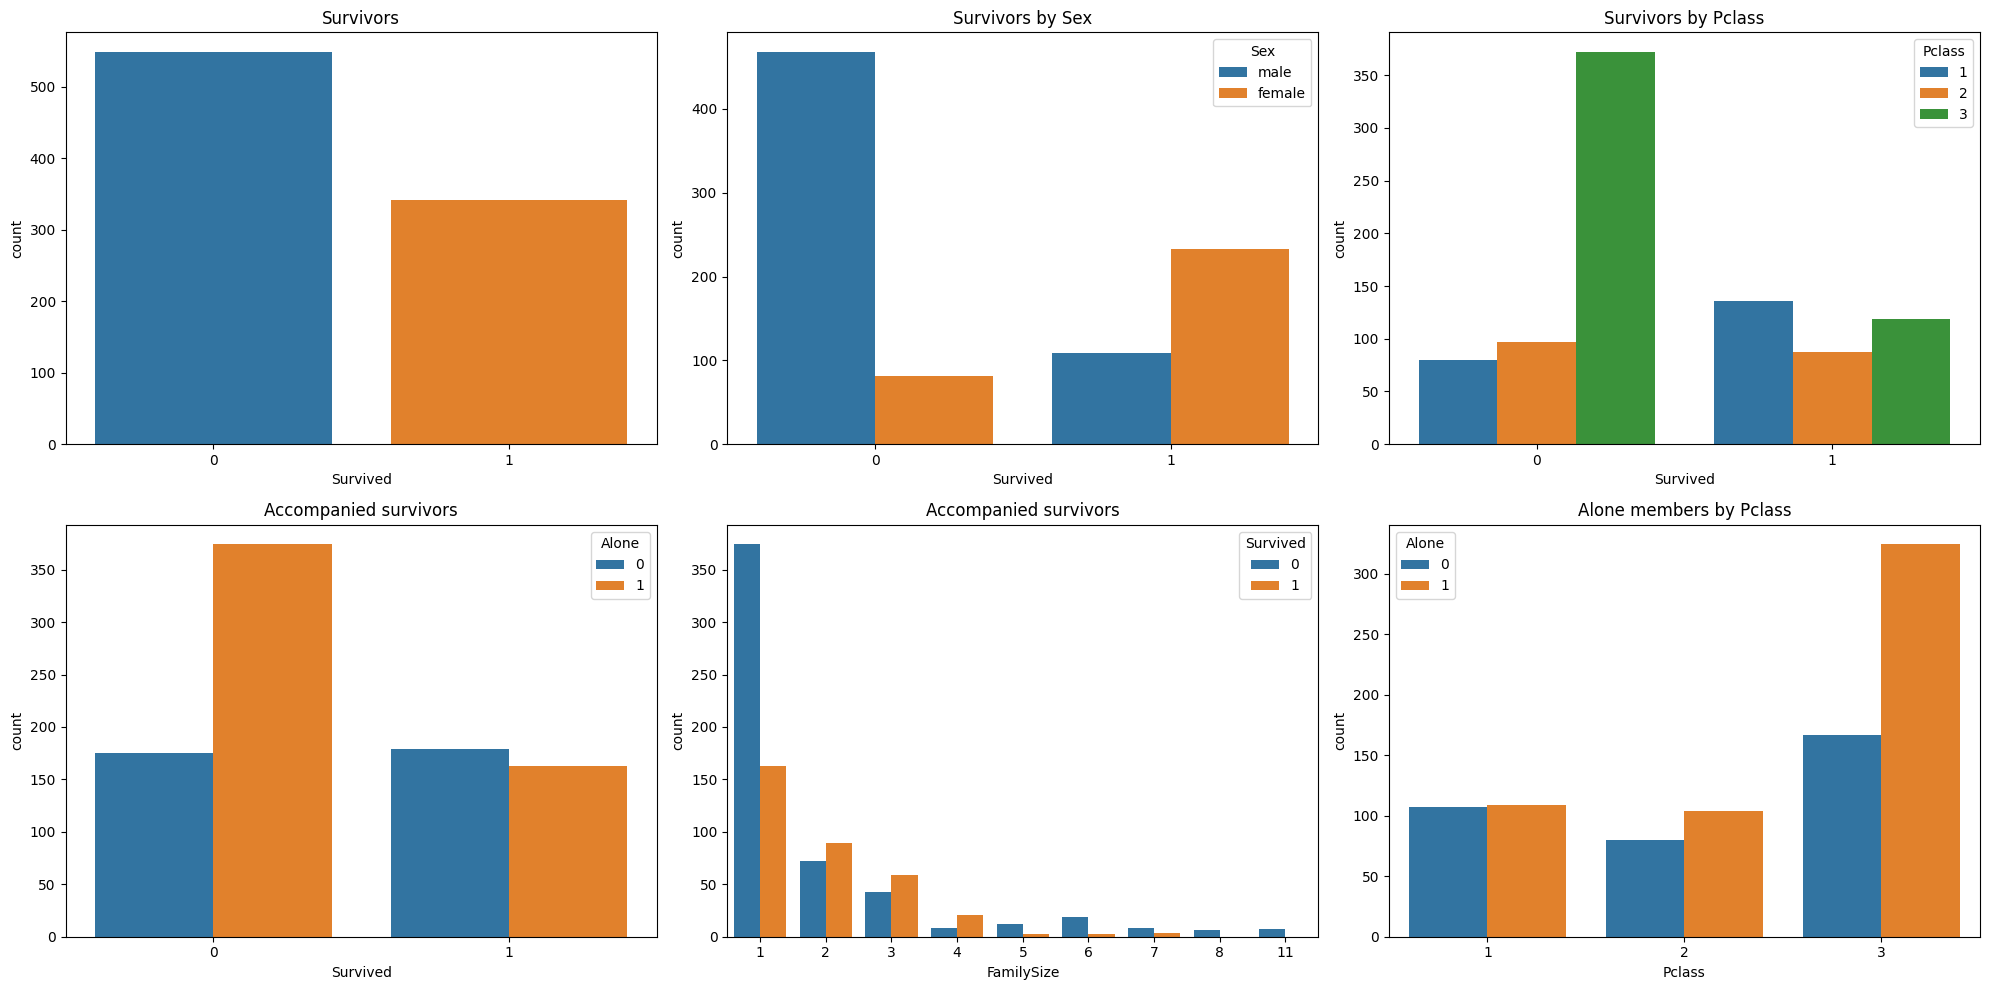

In [1210]:
# 3.3 Feature Engineering - More visualization (countplots)

# make subplots in 2x3 size, set figure size
fig, axx = plt.subplots(2, 3, figsize=(20,10))
sns.countplot(x='Survived', data=train_data, ax=axx[0,0]).set(title='Survivors')
sns.countplot(x='Survived', hue='Sex', data=train_data, ax=axx[0,1]).set(title='Survivors by Sex')
sns.countplot(x='Survived', hue='Pclass', data=train_data, ax=axx[0,2]).set(title='Survivors by Pclass')
sns.countplot(x='Survived', hue='Alone', data=train_data, ax=axx[1,0]).set(title='Accompanied survivors')
sns.countplot(x='FamilySize', hue='Survived', data=train_data, ax=axx[1,1]).set(title='Accompanied survivors')
sns.countplot(x='Pclass', hue='Alone', data=train_data, ax=axx[1,2]).set(title='Alone members by Pclass')
plt.tight_layout()

# Insights from the plots above:

## First plot:
1. More deceased than survived (50-60%)

## Second plot:
1. Male passengers more likely to die than survive
2. Female passengers more likely to survive than die

## Third plot:
1. Third passenger class way more likely to die than first and second

## Fourth plot:
1. Passengers who are alone are more likely to die

## Fifth plot:
1. likelihood to decease much higher when alone
2. likelihood to survive much higher when not alone

## Sixth plot
1. passengers in the third class are more likely to be alone

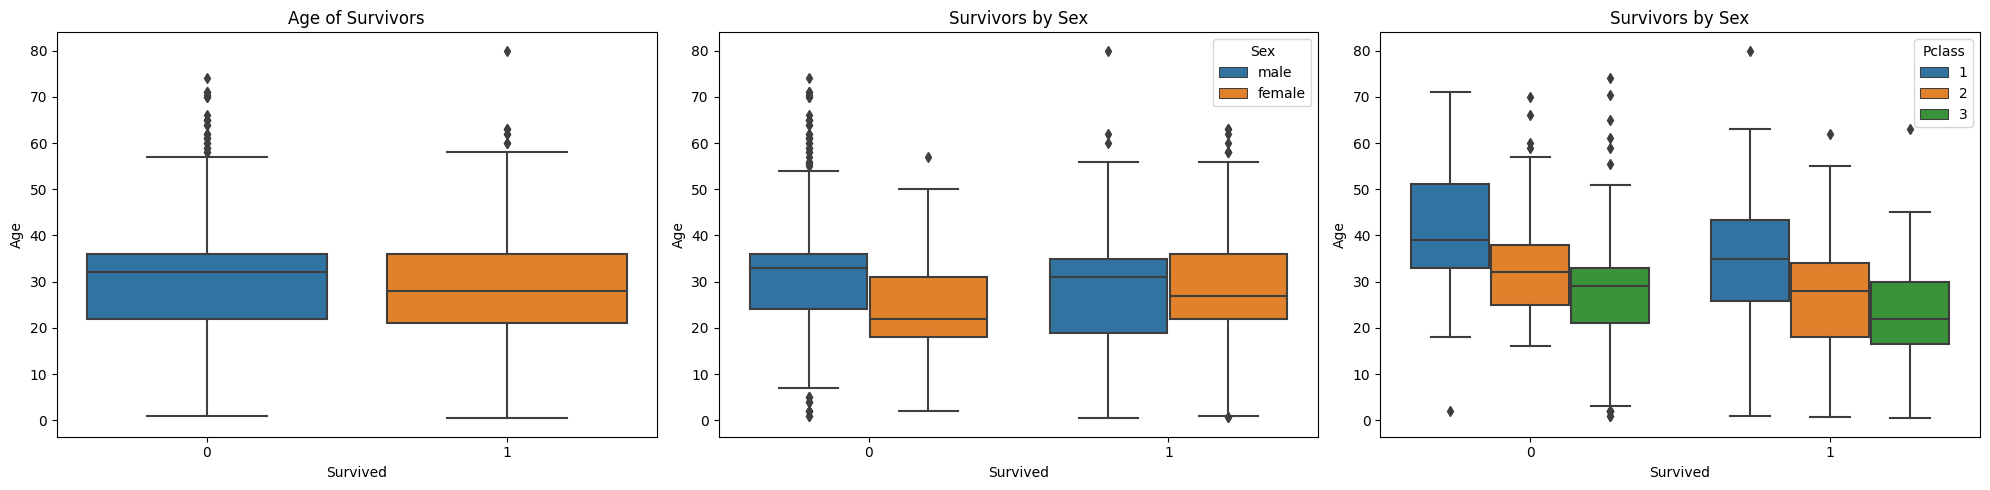

In [1211]:
# 3.4 Feature Engineering - More visualizations (boxplots, histplots)

# Visualization to show different feature's impact

# Boxplots
# figsize(x,y)
# axx is the axes object
fig, axx = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(data=train_data, x='Survived', y='Age', ax=axx[0]).set(title='Age of Survivors')
sns.boxplot(data=train_data, x='Survived', y='Age', hue='Sex',ax=axx[1]).set(title='Survivors by Sex')
sns.boxplot(data=train_data, x='Survived', y='Age', hue="Pclass", ax=axx[2]).set(title='Survivors by Sex')

# histplots
# fig, axx = plt.subplots(1, 2, figsize=(20,5))
# sns.histplot(data=train_data, x=train_data[train_data["Survived"]==0]["Fare"], kde=True, stat='density',bins=30, ax=axx[0]).set(title='Distribution of Fare of Dead Ones')
# sns.histplot(data=train_data, x=train_data[train_data["Survived"]==1]["Fare"], kde=True, stat='density',bins=30, ax=axx[1]).set(title='Distribution of Fare of Surivived Ones')
plt.tight_layout()

# Insights from the plots above
1. Survivors are mostly in their 20-40s
2. 1st class older > 2nd >3rd
3. Fare and Survived has some correlation between, but correlation doesn’t take into account categoricals

# Conclusion
* Map features like Sex and Embarked to numbers.

In [1212]:
# 3.5 Feature Engineering - visualization: heatmap

# Use HeatMap to show the variables' correlation with each other
plt.figure(figsize=(20,5))
# Set numerical variables only to avoid computing correlation for categorical variables (which we will handle later)
sns.heatmap(train_data.corr(numeric_only=True),annot=True)
plt.tight_layout()

Error in callback <function flush_figures at 0x7fe528c9b940> (for post_execute):


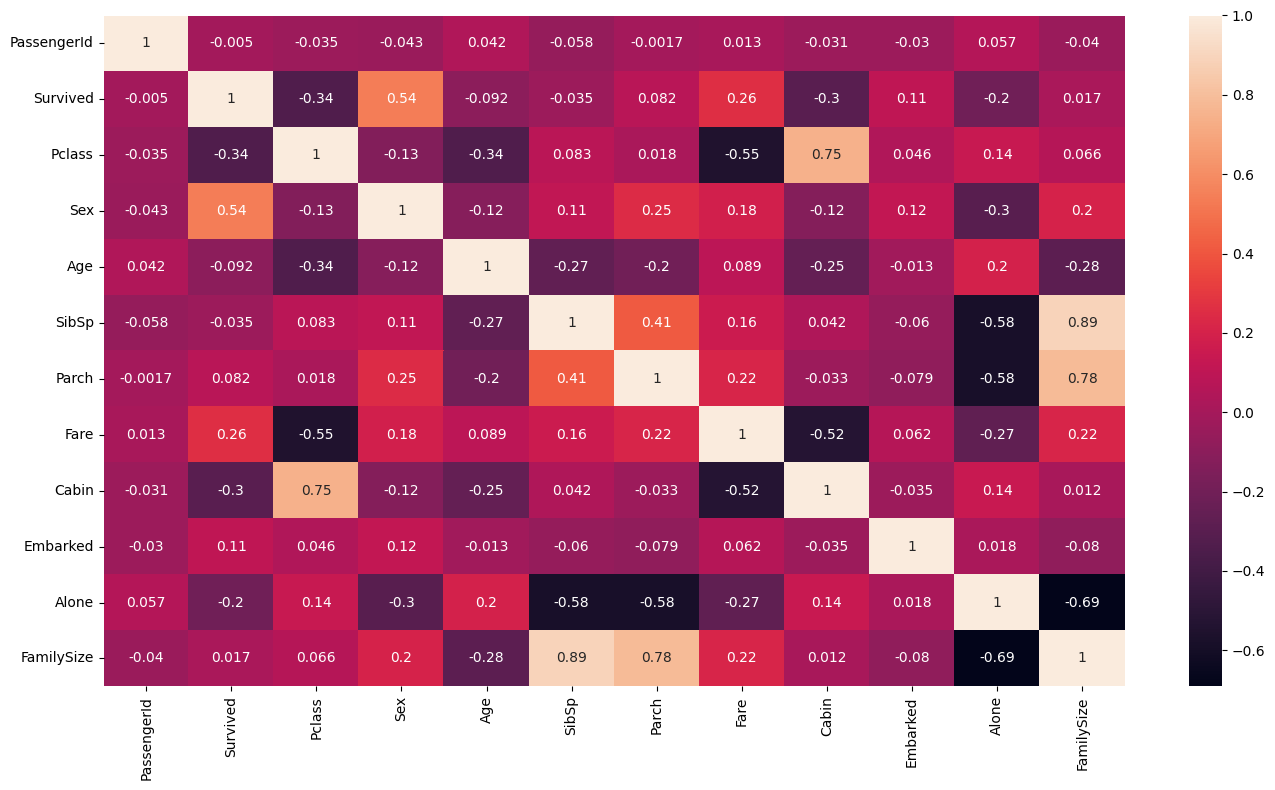

In [ ]:
# 4.1 Mapping (categorical) features

# Purpose: handle categorical data and convert them to numeric

# using map()

# a. Map the Sex feature in dictionary format: 1 as women, 0 as men
sex_categories={'male':0, 'female':1}

# apply category with map on train and test data
# initially returned Nan, ended up reading extra space in data
# solution: skipinitialspace=False when reading data

# For Sex
train_data['Sex']=train_data['Sex'].map(sex_categories)
test_data['Sex']=test_data['Sex'].map(sex_categories)

# Same for Embarked
embark_categories = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked']= train_data['Embarked'].map(embark_categories)
test_data['Embarked']= test_data['Embarked'].map(embark_categories)

# For cabin, use label encoding
# df[column]=df[column].astype("category").cat.codes
categories = train_data.Cabin.unique()
train_data['Cabin'] = train_data.Cabin.astype("category").cat.codes
test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes

# Displaying the heatmap below
plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)
plt.tight_layout()

In [ ]:
# 2.5 Data Examining & Handling - Dropping unimportant features 

# On training and testing data
# columns: Name, Ticket, 'PassengerId'

# using drop() to drop the columns
# df=df.drop([column1, column2, ..., ], axis=1)
train_data=train_data.drop(['Name','Ticket'], axis=1)
test_data=test_data.drop(['Name','Ticket'], axis=1)

# Purpose of Normalizing Data:
1. Eliminate redundant/ duplicae data
2. Minimize data modification problems
3. Clearer/compact data structure
4. Easier to expand data in the future




In [ ]:
# 5.1 Data Normalization with scaler

from sklearn.preprocessing import MinMaxScaler

# Dropping label 
LABEL = 'Survived'
y = train_data[LABEL]
train_data = train_data.drop(LABEL, axis=1)  # Dropping label to normalize

# use scaler to standardize features by removing mean and scaling to unit variance
scaler = MinMaxScaler()
# scale for both train and testing data
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

# make a new data frame
scaled_train = pd.DataFrame(scaled_train, columns=train_data.columns, index=train_data.index)
scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

scaled_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,FamilySize
0,0.000000,1.0,0.0,0.271174,0.125,0.0,0.014151,1.00,0.0,0.0,0.1
1,0.001124,0.0,1.0,0.472229,0.125,0.0,0.139136,0.25,0.5,0.0,0.1
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,1.00,0.0,1.0,0.0
3,0.003371,0.0,1.0,0.434531,0.125,0.0,0.103644,0.25,0.0,0.0,0.1
4,0.004494,1.0,0.0,0.434531,0.000,0.0,0.015713,1.00,0.0,1.0,0.0


# Classifier: Random Forest Classifier

* Extension of Decision Tree, a randomized forest of decision trees
* 3 main hyperparameters: node size, the number of trees, and the number of features 

* Regression: average of individual decision trees
* Classification: majority vote of most frequent variable will yield to predicted variables

In [ ]:
# # Classifier: Random Forest

# # 6.a.1 Modelling - Implementing Model

# # Classification using Random Forest Classifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # split the training data 
# X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Train the model using the training sets 
# clf = RandomForestClassifier(n_estimators=100)

# # Fit the clasifier model
# clf.fit(X_train, y_train)

# # make predictions from model
# y_pred=clf.predict(X_test)

In [ ]:
# # 6.a.2 Modelling - model analysis

# feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)
# # print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # 81%

# # Plot out the features' importance using a barplot

# # plt.figure(figuresize=(20,5))
# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.tight_layout()           

Found out unimportant features:

1. Alone
2. Parch
3. SibSp

In [ ]:
# # 6.a.3 Modelling - Hyperparamater Tuning and model optimization

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# # Removing less important features
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# # 80-20 split
# X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
# clf = RandomForestClassifier(n_estimators=100)

# # Attempt grid search CV (cross validation)
# param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# #     'criterion': ['gini', 'entropy', 'log_loss'],
# #     'min_samples_split' : [2, 3, 4, 5],
# #     'min_samples_leaf' : [1, 2, 3, 4],
# }

# # Do Hyperparameter Tuning
# grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)

# #Train the model using the training sets
# # fit the training data to the classifier
# # clf = RandomForestClassifier(n_estimators=1000, max_depth=3, max_features=None, max_leaf_nodes=9)
# # clf=RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
# #                        n_estimators=50)

# # Fit the tuned model
# tuned_clf=grid_search.best_estimator_
# tuned_clf.fit(X_train, y_train)

# # make predictions on test
# y_pred = tuned_clf.predict(X_test)



In [ ]:
# # 6.a.4 Modelling - Result Presentation

# # Accuracy Score, can go as high as 85%
# print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

# # Classification report
# # print(classification_report(y_test,y_pred))

# # Confusion matrix (TP, FP, TN, NN)
# conf_matrix=confusion_matrix(y_test, y_pred)

# # Seaborn heatmap
# plt.figure(figsize=(8,5))
# sns.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix')
# plt.tight_layout()

# # make predictions on testing data again
# prediction = tuned_clf.predict(new_test)
# # Make a new column to store the predictions
# test_data['Survival_Predictions'] = pd.Series(prediction)

# # Submit Output in Kaggle 
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# Summary of Random Forest Classifier: 

Data: 0.75358, 0.78229, 0.76076, 0.7488, 0.7799
* Lower variation than decision tree

## Advantages: 
* Lower risk of overfitting
* Flexibile (handle both regression and classification)
* Easy to determine feature importance (Gini importance and mean decrease in impurity (MDI))
* Easy to implement

## Disadvantages:
* Time-consuming
* Needs more resources
* More complex than a single decsion tree

# Classifier: Decision Tree

* Non-parametric supervised learning algorithm
* Tree model to show all consequences based on each variable, 
* Used to predict the value of a target variable

In [ ]:
# # Classifier: Decision Tree (a)

# # 6.b.1 Modelling - Implementing Model

# # Classification using Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # split the training data, test with sizes 
# X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Train the model with the default settings
# tree_clf = DecisionTreeClassifier()

# # Fit the clasifier model
# tree_clf.fit(X_train, y_train)

# # make predictions from model
# y_pred=tree_clf.predict(X_test)

In [ ]:
# # # 6.b.2 Modelling - model analysis

# feature_imp = pd.Series(tree_clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)
# print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # # 78%

# # Plot out the features' importance using a barplot
# # plt.figure(figuresize=(20,5))
# plt.figure()
# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.tight_layout()           

In [ ]:
# # 6.b.3 Modelling - Hyperparamater Tuning and model optimization

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# # Removing less important features (determined above)
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# # 80-20 split
# X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)

# # fit the classifier for tuning hyperparameter
# tree_clf = DecisionTreeClassifier()

# # Grid search CV (cross validation) to find the best hyperparameters for tuning
# tree_param_grid = {
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'splitter': ['best', 'random'],
#     'min_samples_split' : [2, 3, 6, 9],
#     'min_samples_leaf' : [1, 3, 6, 9],
# }

# # Perform Hyperparameter Tuning
# tree_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_param_grid)
# tree_grid_search.fit(X_train, y_train)
# print(tree_grid_search.best_estimator_)

# # Fit the tuned model
# tuned_tree_clf=tree_grid_search.best_estimator_
# tuned_tree_clf.fit(X_train, y_train)

# # Tuned model make predictions on test
# y_pred = tuned_tree_clf.predict(X_test)

In [ ]:
# # 6.b.4 Modelling - Result Presentation

# # Accuracy Score, can go as high as 85%
# print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# # Classification report
# print(classification_report(y_test,y_pred))

# # Confusion matrix (TP, FP, TN, NN)
# conf_matrix=confusion_matrix(y_test, y_pred)

# # Seaborn heatmap
# plt.figure(figsize=(8,5))
# sns.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix')
# plt.tight_layout()

# # make predictions on testing data again
# prediction = tuned_tree_clf.predict(new_test)
# # Make a new column to store the predictions
# test_data['Survival_Predictions'] = pd.Series(prediction)

# # Submit Output in Kaggle 
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})

# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# Summary of Decision Tree Classifier: 

Data: 0.72727, 0.76555, 0.77272, 0.77511, 0.78947
* More variation than a random forest

## Advantages: 
* Easy to interpret
* Needed little to no data preparation
* Flexible (can be used in regression and classification)
* Log cost to process the tree
* Handle both numerical and categorical data
* Handle multi-output problems
* Used white box model, an observable model can be easily explained
* Can validate a model using statistical tests
* Can perform well even some of its assumptions are violated

## Disadvantages:
* Easy to overfit, don't generalzie to well
* Easily unstable cause one data can ruin the whole tree
* Its predictions are neither smooth nor continuous since it's approximations
* Can create biased trees
* NP-Complete, hard to learn globally optimal decision tree

# Decision Tree parameter (learned from sklearn):

criterion: Function to measure split {“gini”, “entropy”, “log_loss”}

splitter: strat to split each node, best for best split; random for best random split {“best”, “random”}

max_depth: tree max dept, usually none

min_samples_split: min # of samples to split, usually 1

min_samples_leaf: min # of samples to be a leaf, usually 1

min_weight_fraction_leaf: min weight fraction of the sum of all weights to be a leaf node

max_feature: # of features to consider when look at best split, usually int, RandomState instance or None, default=None

random_state: randomness of the estimator, usually nt, RandomState instance or None, default=None, used because when max_features<=nfeatures algo always select max_features

max_leaf_nodes: usually int or default None aka unlimited

min_impurity_decrease: node splits if this split induce an impunity larger than given value

class_weight: weighting of classes, usually in dict, list of dict or “balanced”, default=None

ccp_alpha: complexity parameter used for cost-complexity pruning (CCP), default=0.0

# Random Forest Classifier Parameters:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Random ForestTree parameter (learned from sklearn):

n_estimators: number of trees in a forest

criterion: Function to measure split {“gini”, “entropy”, “log_loss”}

max_depth: tree max depth

min_samples_split: min # of samples to split, usually 2

min_samples_leaf: min # of samples to be a leaf, usually 1

min_weight_fraction_leaf: min weight fraction of the sum of all weights to be a leaf node, usually 0.0

max_feature: # of features to consider when look at best split, usually int, RandomState instance or None, default=None

max_leaf_nodes: usually int or default None aka unlimited

min_impurity_decrease: node splits if this split induce an impunity larger than given value

bootstrap: whether bootstrap samples used in tree (Boolean), defualt True

oob_score: whether use out of bag(oob) samples to estiamte generalization score (Boolearn, defualt=False)

n_jobs: # of jobs run in parallel

random_state: randomness of the estimator, usually nt, RandomState instance or None, default=None, used because when max_features<=nfeatures algo always select max_features

verbose: controls the verbosity when fitting and predicting

warm_start: when set True, resue solution from last call to fit and add more estimator, ELSE start a new tree

class_weight: weighting of classes, usually in dict, list of dict or “balanced”, default=None

ccp_alpha: complexity parameter used for cost-complexity pruning (CCP), default=0.0

max_samples: if bootstrap set True, the # of samples to draw from X to train each base estimator

In [ ]:
# # Implementing Random Forest Model
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# # assign y to the survived passengers in training data
# y = train_data["Survived"]

# # Build trees based on the features selected
# # features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]
# features = ["Sex", "Fare"]
# # Assign X/X_test to the numerical variables from the training/testing data
# # Use pd.get_dummies to convert categorical variable to a numerical one
# X = pd.get_dummies(train_data[features])

# X_test = pd.get_dummies(test_data[features])
# X_test['Fare'] = X_test['Fare'].fillna(0)


# # Implement random forest classifier with argument
# # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# # Original model: 0.785
# # model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1) 

# # Hyperparamter Tuning: 
# # Optimized Model 1: gini criterion, 1000 DEPTH, rest untouched: ~0.76-0.77
# # Optimized Model 3: gini criterion, 10 DEPTH, n_estimators=10000, rest untouched: ~0.78
# # Optimized Model 4: gini criterion, 1000 DEPTH, n_estimators=10000, rest untouched: ~0.78
# # Optimized Model 5: gini criterion, n_estimators=1000000, rest untouched: ~0.78
# # Optimized Model 6: gini criterion, n_estimators=1000, rest untouched: ~0.76, class_weight adjusted in which survivor is weighted heavier
# # Optimized Model 7: gini criterion, n_estimators=1000, rest untouched: ~0.76, class_weight adjusted in balance
# # Optimized Model 8: featues become only Sex and Fare, rest untouched: ~0.76


# # dict_weights = {1:2, 0: 1, 2:1, 3:1, 4:1}
# # dict_weights = {"Pclass":1, "Sex": 1, "SibSp": 1, "Parch": 1, "Fare": 1}

# optimized_model = RandomForestClassifier(n_estimators=10000, criterion= "gini", max_features=None, bootstrap=True)

# # TRY to fit the model
# optimized_model.fit(X, y)
# # use model.predict to save the model's predictions
# predictions = optimized_model.predict(X_test)

# # Assign output (418x2) to a dataframe
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# Classifier 3: K-Nearest Neighbour Classifier

* Non-parametric, supervised learning algorithm
* Making predictions/ classifictions based on the grouping of individual data point
* Usually use euclidean distance (or Manhattan/ Minkowski
* Defining K becomes important, it defines how many neighbours will be checked to determine classification at a specify query point
* Recommend odd number of K
* Low values of K: high variance, low bias
* High values of K: low variance, high bias

In [ ]:
# # Classifier: K-Nearest Neighbour aka KNN (c)

# # 6.c.1 Modelling - Implementing Model

# # Classification using K-Nearest-Neighbours Classifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # split the training data, test with sizes 
# X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Train the model with the default settings
# k_clf = KNeighborsClassifier()

# # Fit the clasifier model
# k_clf.fit(X_train, y_train)

# # make predictions from model
# y_pred=k_clf.predict(X_test)

In [ ]:
# # 6.c.2 Modelling - model analysis

# print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # 81%

In [ ]:
# # 6.c.3 Modelling - Hyperparamater Tuning and model optimization

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# # Removing less important features
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# # 80-20 split
# X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
# k_clf = KNeighborsClassifier()

# # Attempt grid search CV (cross validation)
# param_grid = {
#     'n_neighbors': [5, 15, 25, 35],
#     'weights': ['uniform', 'distance', None],
#     'algorithm': ['auto','ball_tree','kd_tree','brute'],
#     'leaf_size': [20,30,40,50],
#     'p': [2,3,4,5],
# }

# # Do Hyperparameter Tuning
# grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_estimator_)

# #Train the model using the training sets
# # fit the training data to the classifier
# # clf = RandomForestClassifier(n_estimators=1000, max_depth=3, max_features=None, max_leaf_nodes=9)
# # clf=RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
# #                        n_estimators=50)

# # Fit the tuned model
# k_tuned_clf=grid_search.best_estimator_
# k_tuned_clf.fit(X_train, y_train)

# # make predictions on test
# y_pred = k_tuned_clf.predict(X_test)

In [ ]:
# # 6.c.4 Modelling - Result Presentation

# # Accuracy Score, can go as high as 85%, overall 80~85%
# print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

# # Classification report
# # print(classification_report(y_test,y_pred))

# # Confusion matrix (TP, FP, TN, NN)
# conf_matrix=confusion_matrix(y_test, y_pred)

# # Seaborn heatmap
# plt.figure(figsize=(8,5))
# sns.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix')
# plt.tight_layout()

# # make predictions on testing data again
# prediction = k_tuned_clf.predict(new_test)
# # Make a new column to store the predictions
# test_data['Survival_Predictions'] = pd.Series(prediction)

# # Submit Output in Kaggle 
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})

# print(output)
# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# Summary of K-Nearest Neighbours classifier

Accuracy: 0.76555, 0.75598, 0.77272, 0.74162, 0.73444

* Overall accuracy lower than decision tree and random forest
* Models more accuracte when K is high

## Advantages:  
* Easy to implement
* Few hyperparameters
* Adapts easily

## Disadvantages:  
* Doesn't scale well (lots of resources of larger data)
* Falls into the curse of dimentionality (doesn't perform well in high dimension data)
* Prone to overfitting

# Classifier 4: Linear Support Vector Machine (SVM) for classification

* Mapping data in a higher dimensional feature space to categorize data
* Maximizes predictive accuracy without going overfitting

In [ ]:
# # Classifier: SVC with linear kernel(d)

# # 6.d1.1 Modelling - Implementing Model

# # Classification using support vector classifier with linear kernel
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # split the training data, test with sizes 
# X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Train the model with the default settings
# svc_clf = SVC(kernel="linear")

# # Fit the clasifier model
# svc_clf.fit(X_train, y_train)

# # make predictions from model
# y_pred=svc_clf.predict(X_test)

In [ ]:
# # 6.d1.2 Modelling - model analysis

# from pandas import Series
# from matplotlib import pyplot as plt

# # feature_imp = pd.Series(svc_clf.coef_, index=scaled_train.columns).sort_values(ascending=False)

# feature_imp=pd.Series(abs(svc_clf.coef_[0]), index=scaled_train.columns).sort_values(ascending=False)
# print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # 82.68%

# # # Plot out the features' importance using a barplot
# # plt.figure(figuresize=(20,5))
# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.tight_layout()           

In [ ]:
# # 6.d1.3 Modelling - Hyperparamater Tuning and model optimization

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# # Removing less important features (determined above)
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# # 80-20 split
# X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)

# # fit the classifier for tuning hyperparameter
# svc_clf = SVC(kernel="linear")

# # Grid search CV (cross validation) to find the best hyperparameters for tuning
# svc_param_grid = {
#     'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
#     'degree': [3, 4, 5, 6, 7, 8, 9],
#     'tol': [1e-4, 1e-3, 1e-2, 0.1],
#     'class_weight' : [None, 'balanced']
# }

# # Perform Hyperparameter Tuning
# svc_grid_search = GridSearchCV(SVC(kernel="linear"), param_grid=svc_param_grid)
# svc_grid_search.fit(X_train, y_train)
# print(svc_grid_search.best_estimator_)

# # Fit the tuned model
# tuned_svc_clf=svc_grid_search.best_estimator_
# tuned_svc_clf.fit(X_train, y_train)

# # Tuned model make predictions on test
# y_pred = tuned_svc_clf.predict(X_test)

In [ ]:
# # 6.d1.4 Modelling - Result Presentation

# # Accuracy Score, can go as high as 85%
# print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# # Classification report
# print(classification_report(y_test,y_pred))

# # Confusion matrix (TP, FP, TN, NN)
# conf_matrix=confusion_matrix(y_test, y_pred)

# # Seaborn heatmap
# plt.figure(figsize=(8,5))
# sns.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix')
# plt.tight_layout()

# # make predictions on testing data again
# prediction = tuned_svc_clf.predict(new_test)
# # Make a new column to store the predictions
# test_data['Survival_Predictions'] = pd.Series(prediction)

# # Submit Output in Kaggle 
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})

# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [ ]:
# # Classifier: Linear Support Vector Classification(d2)

# # Similar to SVC with parameter kernel=’linear’, 
# # but implemented in terms of liblinear rather than libsvm, 

# # Has more flexibility in the choice of penalties and loss functions
# # Should scale better to large numbers of samples.

# # 6.d2.1 Modelling - Implementing Model

# # Classification using Linear Support Vector Classification.
# from sklearn.svm import LinearSVC
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # split the training data, test with sizes 
# X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Train the model with the default settings
# linsvc_clf = LinearSVC()

# # Fit the clasifier model
# linsvc_clf.fit(X_train, y_train)

# # make predictions from model
# y_pred=linsvc_clf.predict(X_test)

In [ ]:
# # 6.d2.2 Modelling - model analysis

# from pandas import Series
# from matplotlib import pyplot as plt

# # feature_imp = pd.Series(svc_clf.coef_, index=scaled_train.columns).sort_values(ascending=False)

# feature_imp=pd.Series(abs(linsvc_clf.coef_[0]), index=scaled_train.columns).sort_values(ascending=False)
# print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # 82.68%

# # # Plot out the features' importance using a barplot
# # plt.figure(figuresize=(20,5))
# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.tight_layout()           

In [ ]:
# # 6.d2.3 Modelling - Hyperparamater Tuning and model optimization

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# # Removing less important features (determined above)
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# # 80-20 split
# X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)

# # fit the classifier for tuning hyperparameter
# linsvc_clf = LinearSVC()

# # Grid search CV (cross validation) to find the best hyperparameters for tuning
# linsvc_param_grid = {
# #     'penalty': ['l1','l2'],
# #     'loss': ['hinge', 'squared_hinge'],
#     'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50],
#     'tol': [1e-4, 1e-3, 1e-2, 0.1],
#     'max_iter': [10000, 100000, 1000000],
# }

# # Perform Hyperparameter Tuning
# linsvc_grid_search = GridSearchCV(LinearSVC(), param_grid=linsvc_param_grid, error_score='raise')
# linsvc_grid_search.fit(X_train, y_train)
# print(linsvc_grid_search.best_estimator_)

# # Fit the tuned model
# tuned_linsvc_clf=linsvc_grid_search.best_estimator_
# tuned_linsvc_clf.fit(X_train, y_train)

# # Tuned model make predictions on test
# y_pred = tuned_linsvc_clf.predict(X_test)

In [ ]:
# # 6.d2.4 Modelling - Result Presentation

# # Accuracy Score, can go as high as 85%
# print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# # Classification report
# print(classification_report(y_test,y_pred))

# # Confusion matrix (TP, FP, TN, NN)
# conf_matrix=confusion_matrix(y_test, y_pred)

# # Seaborn heatmap
# plt.figure(figsize=(8,5))
# sns.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix')
# plt.tight_layout()

# # make predictions on testing data again
# prediction = tuned_linsvc_clf.predict(new_test)
# # Make a new column to store the predictions
# test_data['Survival_Predictions'] = pd.Series(prediction)

# # Submit Output in Kaggle 
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})

# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# Summary of Linear SVM

## For SVC with linear kernel
* Regular accuracy and tuned accuracy lower than decision tree,  random forest, and KNN
* Value of C fluctuates when tuning
* Kaggle accuracy has little to no variance, always the same

* Kaggle accuracy: 0.76555, 0.76555, 0.77511, 0.76555, 0.76555

## For linear SVC
* Accuracy and tuned accuracy relatviely high 

* Kaggle accruacy has little to no variance
* Kaggle accuracy: 0.76076, 0.77751, 0.76794, 0.77511, 0.75837

## Advantages:  
* Effective in high dimensional spaces
* Effective even when # of dimensions > # of samples
* Memory Efficient, uses subset of training points in decision function (support vectors)
* Versatile, can use different kernel (linear, RBF, etc)

## Disadvantages:  
* If # of features > # of samples, crucial to choose the right kernel to prevent overfitting
* Not directly provide probability estimates, instead they are calculated by expensive 5-fold CV

# Classifier 5: Support Vector Machine (SVM) with nonlinear (polynomail, RBF) kernel

* Mapping data in a higher dimensional feature space to categorize data
* Maximizes predictive accuracy without going overfitting
* Uses Non-linear kernel

In [ ]:
# # Classifier: SVC with nonlinear (polynomial kernel) kernel(e)

# # 6.e1.1 Modelling - Implementing Model

# # Classification using support vector classifier with polynomial kernel
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # split the training data, test with sizes 
# X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Train the model with the default settings
# poly_svc_clf = SVC(kernel="poly")

# # Fit the clasifier model
# poly_svc_clf.fit(X_train, y_train)

# # make predictions from model
# y_pred=poly_svc_clf.predict(X_test)

In [ ]:
# # 6.e1.2 Modelling - model analysis

# print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # 82.68%

# print(classification_report(y_test,y_pred))

# # Hard to get feature importance when svc uses non-linear kernel since the dataset is mapped to higher dimension, and the hyperplane is determine in that dimension.

In [ ]:
# # 6.e1.3 Modelling - Hyperparamater Tuning and model optimization

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# # Removing less important features (determined above)
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# # 80-20 split
# X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)

# # fit the classifier for tuning hyperparameter
# poly_svc_clf = SVC(kernel="poly")

# # Grid search CV (cross validation) to find the best hyperparameters for tuning
# poly_svc_param_grid = {
# #     'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
#     'degree': [3, 4, 5, 6, 7],
#     'tol': [1e-4, 1e-3, 1e-2, 0.1],
#     'class_weight' : [None, 'balanced'], 
    
# }

# # Perform Hyperparameter Tuning
# poly_svc_grid_search = GridSearchCV(SVC(kernel="poly"), param_grid=poly_svc_param_grid)
# poly_svc_grid_search.fit(X_train, y_train)
# print(poly_svc_grid_search.best_estimator_)

# # Fit the tuned model
# tuned_poly_svc_clf=poly_svc_grid_search.best_estimator_
# tuned_poly_svc_clf.fit(X_train, y_train)

# # Tuned model make predictions on test
# y_pred = tuned_poly_svc_clf.predict(X_test)

In [ ]:
# # 6.e1.4 Modelling - Result Presentation

# # Accuracy Score, can go as high as 85%
# print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# # Classification report
# print(classification_report(y_test,y_pred))

# # Confusion matrix (TP, FP, TN, NN)
# conf_matrix=confusion_matrix(y_test, y_pred)

# # Seaborn heatmap
# plt.figure(figsize=(8,5))
# sns.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix')
# plt.tight_layout()

# # make predictions on testing data again
# prediction = tuned_poly_svc_clf.predict(new_test)
# # Make a new column to store the predictions
# test_data['Survival_Predictions'] = pd.Series(prediction)

# # Submit Output in Kaggle 
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})

# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [ ]:
# # Classifier: SVC with nonlinear (RBF kernel) kernel(e2)

# # 6.e2.1 Modelling - Implementing Model

# # Classification using support vector classifier with polynomial kernel
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # split the training data, test with sizes 
# X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Train the model with the default settings
# rbf_svc_clf = SVC(kernel="rbf")

# # Fit the clasifier model
# rbf_svc_clf.fit(X_train, y_train)

# # make predictions from model
# y_pred=rbf_svc_clf.predict(X_test)

In [ ]:
# # 6.e2.2 Modelling - model analysis

# print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # As high as 83.8%

# print(classification_report(y_test,y_pred))

# # Hard to get feature importance when svc uses non-linear kernel since the dataset is mapped to higher dimension, and the hyperplane is determine in that dimension.

In [ ]:
# # 6.e2.3 Modelling - Hyperparamater Tuning and model optimization

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# # Removing less important features (determined above)
# # new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# # new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'Pclass', 'PassengerId','Cabin'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'Pclass', 'PassengerId','Cabin'], axis=1)

# # 80-20 split
# X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)

# # fit the classifier for tuning hyperparameter
# rbf_svc_clf = SVC(kernel="rbf")

# # Grid search CV (cross validation) to find the best hyperparameters for tuning
# rbf_svc_param_grid = {
#     'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
#     'tol': [1e-4, 1e-3, 1e-2, 0.1],
#     'gamma': [0.0001, 0.001, 0.01, 0.1]
# }

# # Perform Hyperparameter Tuning
# rbf_svc_ran_search = RandomizedSearchCV(rbf_svc_clf, rbf_svc_param_grid, cv=5)
# rbf_svc_ran_search.fit(X_train, y_train)
# # print(pd.DataFrame(rbf_svc_grid_search.cv_results_))

# # print(rbf_svc_grid_search.best_params)
# print(rbf_svc_ran_search.best_estimator_)
# # print(rbf_svc_grid_search.best_score_)
# # print(rbf_svc_grid_search.best_params_)

# # Fit the tuned model
# tuned_rbf_svc_clf=rbf_svc_ran_search.best_estimator_
# tuned_rbf_svc_clf.fit(X_train, y_train)


# # Tuned model make predictions on test
# y_pred = tuned_rbf_svc_clf.predict(X_test)

In [ ]:
# # 6.e2.4 Modelling - Result Presentation

# # Accuracy Score, can go as high as 85%
# print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# # Classification report
# print(classification_report(y_test,y_pred))

# # Confusion matrix (TP, FP, TN, NN)
# conf_matrix=confusion_matrix(y_test, y_pred)

# # Seaborn heatmap
# plt.figure(figsize=(8,5))
# sns.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix')
# plt.tight_layout()

# # make predictions on testing data again
# prediction = tuned_rbf_svc_clf.predict(new_test)
# # Make a new column to store the predictions
# test_data['Survival_Predictions'] = pd.Series(prediction)

# # Submit Output in Kaggle 
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})

# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# Summary of Nonlinear SVM

## For SVC with polynomial kernel
* Highest regular accuracy and tuned accuracy 
* Value of C fluctuates when tuning
* Kaggle accuracy has little to no variance, always the same

* Kaggle accuracy: 0.77751, 0.75837, 0.77272(t), 0.77272(t), 0.77511(t), 0.77511

## For SVC with RBF kernel
* 0.76555, 0.622(!), 0.76555, 0.76555, 0.76555
* Strong evidence of overfitting

## Advantages:  
* Better in higher dimension

## Disadvantages:  
* Easier to overfit than linear SVM

## Linear vs Nonlinear SVM 
* Linear uses a single line to separate data, nonlinear uses a decision boundary (nonlinear shape)

# Classifier 6: Logistic Regression

* Linear regression with higher degree level (polynomial)
* Separate/ classify data with a non-linear line
* Known example: Sigmoid function

In [ ]:
# # Classifier: Logistic Regression(f)

# # 6.f.1 Modelling - Implementing Model

# # Classification using support vector classifier with polynomial kernel
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# # split the training data, test with sizes 
# X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

# # Train the model with the default settings
# log_reg_clf = LogisticRegression()

# # Fit the clasifier model
# log_reg_clf.fit(X_train, y_train)

# # make predictions from model
# y_pred=log_reg_clf.predict(X_test)

(712, 11) (179, 11)
(712,) (179,)


Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       108
           1       0.74      0.72      0.73        71

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



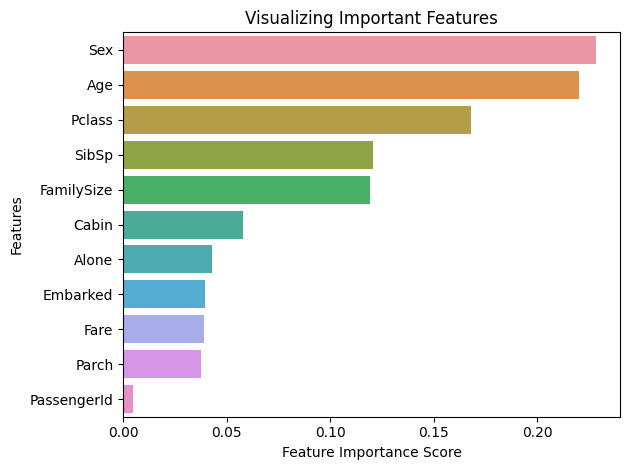

In [ ]:
# # 6.f.2 Modelling - model analysis

# print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# # 83.2%

# print(classification_report(y_test,y_pred))

# # Feature Importance found through the coefficients 
# feature_imp = pd.Series(np.abs(log_reg_clf.coef_[0]/len(scaled_train.columns)), index=scaled_train.columns).sort_values(ascending=False)

# # Plot out the features' importance using a barplot
# # plt.figure(figuresize=(20,5))
# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.tight_layout() 

In [ ]:
# # 6.f.3 Modelling - Hyperparamater Tuning and model optimization

# from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# # Removing less important features (determined above)
# # new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# # new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'Pclass', 'PassengerId','Cabin'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'Pclass', 'PassengerId','Cabin'], axis=1)

# # 80-20 split
# X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)

# # fit the classifier for tuning hyperparameter
# log_reg_clf = LogisticRegression()

# # Grid search CV (cross validation) to find the best hyperparameters for tuning
# log_reg_param_grid = {
#     'penalty':['l1','l2'],
#     'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
#     'tol': [1e-4, 1e-3, 1e-2, 0.1],
# #     'gamma': [0.0001, 0.001, 0.01, 0.1],
#     'solver':['saga']
# }

# # Perform Hyperparameter Tuning
# log_reg_ran_search = RandomizedSearchCV(log_reg_clf, log_reg_param_grid)
# log_reg_ran_search.fit(X_train, y_train)
# # print(pd.DataFrame(rbf_svc_grid_search.cv_results_))

# print(log_reg_ran_search.best_estimator_)

# # Fit the tuned model
# tuned_log_reg_clf=log_reg_ran_search.best_estimator_
# tuned_log_reg_clf.fit(X_train, y_train)


# # Tuned model make predictions on test
# y_pred = tuned_log_reg_clf.predict(X_test)

LogisticRegression(C=50, solver='saga', tol=0.01)


Tuned Accuracy: 0.7541899441340782
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       109
           1       0.70      0.64      0.67        70

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179

Your submission was successfully saved!


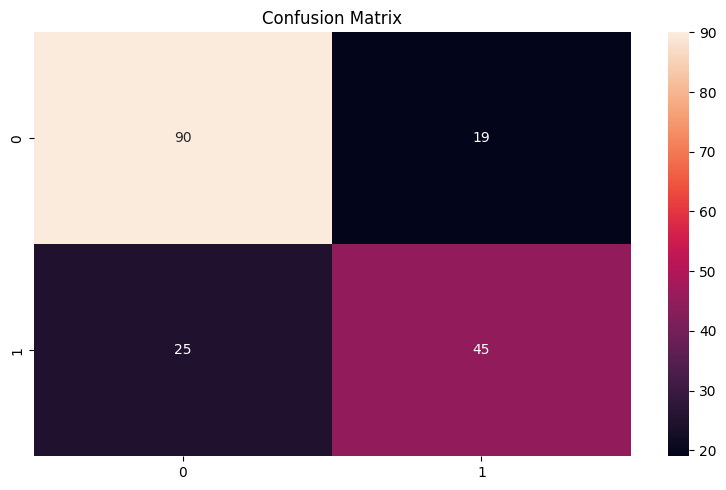

In [ ]:
# # 6.f.4 Modelling - Result Presentation

# # Accuracy Score, can go as high as 85%
# print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# # Classification report
# print(classification_report(y_test,y_pred))

# # Confusion matrix (TP, FP, TN, NN)
# conf_matrix=confusion_matrix(y_test, y_pred)

# # Seaborn heatmap
# plt.figure(figsize=(8,5))
# sns.heatmap(conf_matrix, annot=True)
# plt.title('Confusion Matrix')
# plt.tight_layout()

# # make predictions on testing data again
# prediction = tuned_log_reg_clf.predict(new_test)
# # Make a new column to store the predictions
# test_data['Survival_Predictions'] = pd.Series(prediction)

# # Submit Output in Kaggle 
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})

# # Assign output to a csv file
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

# Summary of Logistic Regression

* Kaggle accuracy: 0.75358, 0.76794, 0.77272, 0.76315, 0.76555

## Advantages:  
* Straightforward, easy to implement
* Easily extend to multinomial classification
* Provide direction of association (+/-) along with making prediction
* Good accuracy for simple dataset, especially when data can be linearlly separable

## Disadvantages:  
* Prone to overfit when # of data < # of features
* Only used to predict discrete function
* Can't solve non-linear problems because it has a linear surface
* Tough to find complex relationship between features and target, outperformed by compact algo like NN.

# Classifier 7: Naives Bayes

* Set of SL algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable
* Its predictors are conditionally independent

## Gaussian Naive Bayes (g1)
* Naive Bayes with gaussian distributions for feature values
* Fitted by finding the mean and standard deviation of each class 

## Multinomial Naive Bayes (g2)
* Naive Bayes with multinomial distributions for feature values
* Useful when using discrete data, such as frequency counts

## NB Algorithm:
1. Calculate prior probability for given class labels
2. Create a frequency table out of given historical data
3. Find likelihood probability with each attribute of each class. 4. For example, given it was Sunny weather, was the flight in time.
5. Now put these values into the Bayes formula and calculate posterior probability.
6. The class with the highest probability will be the outcome.

In [ ]:
# Classifier: Naive Bayes(g) - Gaussian Naive Bayes (g1)

# 6.g1.1 Modelling - Implementing Model

# Classification using support vector classifier with polynomial kernel
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# split the training data, test with sizes 
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train the model with the default settings
gauss_NB_clf = GaussianNB()

# Fit the clasifier model
gauss_NB_clf.fit(X_train, y_train)

# make predictions from model
y_pred=gauss_NB_clf.predict(X_test)

In [ ]:
# 6.g1.2 Modelling - model analysis

# use permutation importance to find feature importance in Gaussian NB
from sklearn.inspection import permutation_importance

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) 
# 83.2%

print(classification_report(y_test,y_pred))

importances = permutation_importance(gauss_NB_clf, X_train, y_train)
# print(importances.importances_mean)

# Feature Importance found through the coefficients 
feature_imp = pd.Series(np.abs(importances.importances_mean), index=scaled_train.columns).sort_values(ascending=False)

# Plot out the features' importance using a barplot
# plt.figure(figuresize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout() 

In [ ]:
# 6.g1.3 Modelling - Hyperparamater Tuning and model optimization

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Removing less important features (determined above)
# new_train = scaled_train.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)
# new_test = scaled_test.drop(['Alone','Parch','Embarked', 'SibSp'], axis=1)

new_train = scaled_train.drop(['Alone','Parch','Embarked', 'Pclass', 'PassengerId','Cabin'], axis=1)
new_test = scaled_test.drop(['Alone','Parch','Embarked', 'Pclass', 'PassengerId','Cabin'], axis=1)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)

# fit the classifier for tuning hyperparameter
gauss_NB_clf = GaussianNB()

# Grid search CV (cross validation) to find the best hyperparameters for tuning
gauss_NB_param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1],
}

# Perform Hyperparameter Tuning
gauss_NB_ran_search = RandomizedSearchCV(gauss_NB_clf, gauss_NB_param_grid)
gauss_NB_ran_search.fit(X_train, y_train)

print(gauss_NB_ran_search.best_estimator_)

# Fit the tuned model
tuned_gauss_NB_clf=gauss_NB_ran_search.best_estimator_
tuned_gauss_NB_clf.fit(X_train, y_train)


# Tuned model make predictions on test
y_pred = tuned_gauss_NB_clf.predict(X_test)

In [ ]:
# 6.g1.4 Modelling - Result Presentation

# Accuracy Score, can go as high as 85%
print("Tuned Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred))) # 75~77%

# Classification report
# print(classification_report(y_test,y_pred))

# Confusion matrix (TP, FP, TN, NN)
conf_matrix=confusion_matrix(y_test, y_pred)

# Seaborn heatmap
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# make predictions on testing data again
prediction = tuned_gauss_NB_clf.predict(new_test)
# Make a new column to store the predictions
test_data['Survival_Predictions'] = pd.Series(prediction)

# Submit Output in Kaggle 
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})

# Assign output to a csv file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")